# Section 3 
### Model selection for structure estimation with BIC

In [1]:
# Slice with array

import numpy as np
array_x = np.array([0, 10, 20, 30, 40, 50])
print(array_x[2:5])
print(array_x[:3])
print(array_x[3:])
print(array_x[:])

[20 30 40]
[ 0 10 20]
[30 40 50]
[ 0 10 20 30 40 50]


### Calculation of likelihood, and model selection by BIC

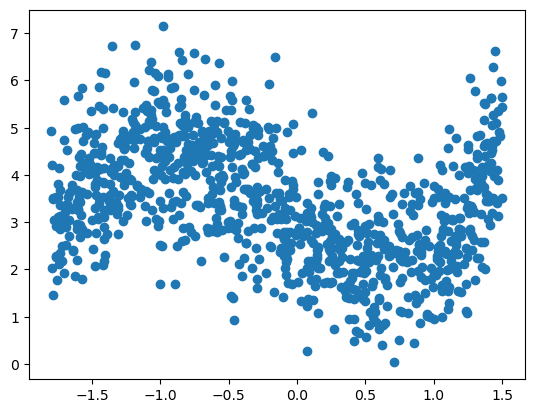

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
max_n = 1000
sigma = 1
beta0 ,beta1, beta2, beta3 = 3, -2, 0.5, 1
array_beta = np.array([beta1, beta2, beta3])
array_x = np.random.uniform(-1.8, 1.5, max_n)
list2d_x = []
for x in array_x:
    list2d_x += [[x, x**2, x**3]]
arr2d_x = np.array(list2d_x)
array_f = np.dot(arr2d_x, array_beta) + beta0
array_y = array_f + np.random.normal(0, sigma, max_n)
plt.scatter(array_x, array_y)

list2d_maxx = []
for x in array_x:
    list2d_maxx += [[x, x**2, x**3, x**4, x**5]]
arr2d_maxx = np.array(list2d_maxx)

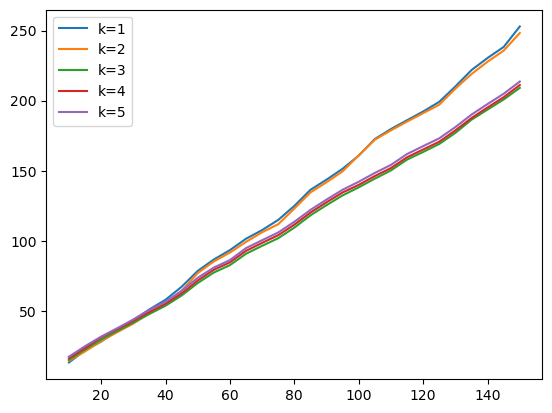

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
list_n = range(10, 151, 5)
for k in range(1, 6):
    list_BICk = []
    for n in list_n:
        reg.fit(arr2d_maxx[:n, :k], array_y[:n])
        array_yhat = reg.predict(arr2d_maxx[:n, :k])
        a = (n/2)*np.log(2*np.pi*(sigma**2))
        b = 1/(2*(sigma**2))*sum((array_y[:n]-array_yhat)**2)
        c = ((k+1)/2)*np.log(n)
        list_BICk += [a+b+c]
    plt.plot(list_n, list_BICk, label="k={0}".format(k))
plt.legend(loc="upper left")

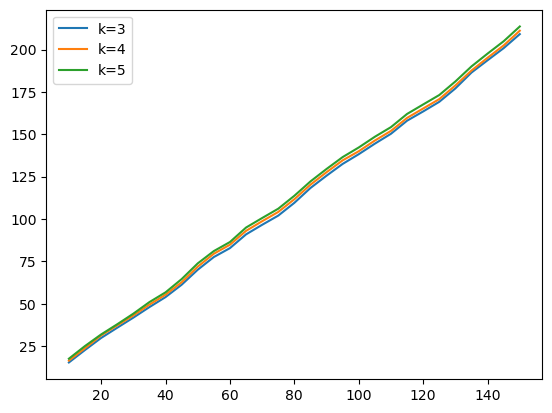

In [15]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
list_n = range(10, 151, 5)

for k in range(3, 6):
    list_BICk = []
    for n in list_n:
        reg.fit(arr2d_maxx[:n, :k], array_y[:n])
        array_yhat = reg.predict(arr2d_maxx[:n, :k])
        a = (n/2)*np.log(2*np.pi*(sigma**2))
        b = 1/(2*(sigma**2))*sum((array_y[:n]-array_yhat)**2)
        c = ((k+1)/2)*np.log(n)
        list_BICk += [a+b+c]
    plt.plot(list_n, list_BICk, label="k={0}".format(k))
plt.legend(loc="upper left")

### Exercise

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

arr2d_data = np.loadtxt('polyreg2.csv', delimiter=",")
array_x = arr2d_data[:, 0]
array_y = arr2d_data[:, 1]
n = array_x.size
sigma = 1
list2d_maxX = []
for x in array_x:
    list2d_maxX += [[x, x**2, x**3, x**4, x**5]]
arr2d_maxX = np.array(list2d_maxX)
reg = LinearRegression()
for k in range(1, 6):
    reg.fit(arr2d_maxX[:, :k], array_y)
    array_yhat = reg.predict(arr2d_maxX[:, :k])
    a = (n/2)*np.log(2*np.pi*(sigma**2))
    b = 1/(2*(sigma**2))*sum((array_y-array_yhat)**2)
    c = ((k+1)/2)*np.log(n)
    print(f"{a+b+c:.2f}")
    

358.55
313.81
140.38
142.59
144.85
